# How are in-demand skills trending for Data Analysts?

#### Methodology
1. Aggregate skill counts monthly
2. Plot the monthly skill counts
3. Re-analyze based on percentage of total jobs
4. Plot the monthly skill demand

#### Original Exploration

[12_Exercise_Trending_Skills.ipynb](../2_Advanced/12_Exercise_Trending_Skills.ipynb)

### Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Setting what role and which country to explore
role = 'Data Analyst'
country = 'Hungary'

### Group the Skills by Month

First, we want to group and order the skills in our data by month. For this, we need a column that has the numerical value of the month of the posting, and each skill in its own row.

In [3]:
# Filtering for role and country
df_role_country = df[(df['job_title'] == role) & (df['job_country'] == country)].copy()

# Preparing to group and order by month by making a new column
df_role_country['job_posted_month_no'] = df_role_country['job_posted_date'].dt.month

# Getting each skill its own row
df_role_country_explode = df_role_country.explode('job_skills')

#### Pivot as Preparation for Plotting

Now that we have the data in the shape we can use, we create a pivot table to group and order it.

In [9]:
# Pivot, filling NaN values with 0
df_role_country_pivot = df_role_country_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# We introduce a helping row to have the total occurrence number of each skill
df_role_country_pivot.loc['Total'] = df_role_country_pivot.sum()

# We sort the columns to have the overall most in-demand skills at the front of our pivot table
df_role_country_pivot = df_role_country_pivot[df_role_country_pivot.loc['Total'].sort_values(ascending=False).index]

# We don't need that helping row anymore, we drop it
df_role_country_pivot = df_role_country_pivot.drop('Total')

df_role_country_pivot

job_skills,sql,python,excel,tableau,power bi,r,sap,vba,alteryx,oracle,...,cognos,javascript,databricks,qlik,flow,gcp,gdpr,nosql,hadoop,sharepoint
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,9,6,4,2,2,1,2,3,1,0,...,0,1,0,0,0,0,0,1,0,0
2,8,9,7,7,4,2,3,0,3,0,...,0,0,1,0,0,0,0,0,0,0
3,6,3,4,3,3,0,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
4,10,7,9,6,1,2,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
5,8,5,4,5,2,4,2,2,1,0,...,0,0,0,0,0,0,0,0,1,1
6,8,4,3,2,6,2,3,1,0,0,...,1,0,0,0,0,1,0,0,0,0
7,8,3,5,3,2,0,2,0,2,1,...,0,0,0,0,0,0,0,0,0,0
8,4,3,4,3,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,2,2,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Plotting the Monthly Skill Counts

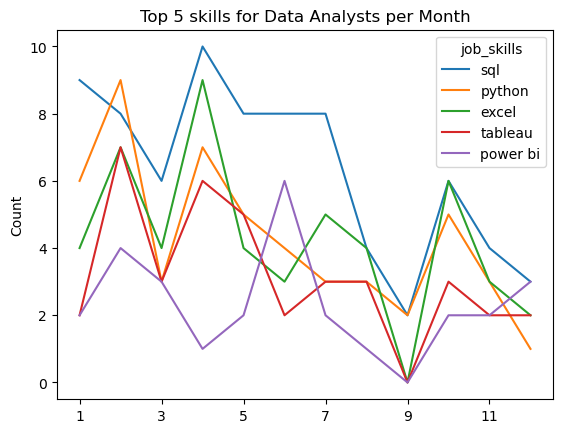

In [10]:
df_role_country_pivot.iloc[:, :5].plot(kind='line')

plt.title(f'Top 5 skills for {role}s per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

This is okay, but it can be misleading without proper context. Percentage of likelihoods will be easier to interpret, giving a more accurate comparison.

### Calculate the Percentage of Total Jobs

We need the total number of job postings in each month to see what is the ratio of postings mentioning each skill to postings that don't.

In [11]:
# Get monthly totals of job postings
role_totals = df_role_country.groupby('job_posted_month_no').size()

role_totals

job_posted_month_no
1     14
2     16
3      7
4     13
5     11
6     10
7      9
8     11
9      5
10    12
11     8
12     6
dtype: int64

Using this, we can now calculate the percentages that we want to show on our plot. To further clear up our line plot, we get the name of the months to show instead of numbers.

In [14]:
# Getting the percentage data
df_role_country_percent = df_role_country_pivot.div(role_totals/100, axis=0)

# Changing the numerical value of months to their names
df_role_country_percent = df_role_country_percent.reset_index()
df_role_country_percent['job_posted_month'] = df_role_country_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_role_country_percent = df_role_country_percent.set_index('job_posted_month')
df_role_country_percent = df_role_country_percent.drop(columns='job_posted_month_no')

df_role_country_percent

job_skills,sql,python,excel,tableau,power bi,r,sap,vba,alteryx,oracle,...,cognos,javascript,databricks,qlik,flow,gcp,gdpr,nosql,hadoop,sharepoint
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,64.285714,42.857143,28.571429,14.285714,14.285714,7.142857,14.285714,21.428571,7.142857,0.000000,...,0.0,7.142857,0.00,0.000000,0.000000,0.0,0.0,7.142857,0.000000,0.000000
Feb,50.000000,56.250000,43.750000,43.750000,25.000000,12.500000,18.750000,0.000000,18.750000,0.000000,...,0.0,0.000000,6.25,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Mar,85.714286,42.857143,57.142857,42.857143,42.857143,0.000000,14.285714,28.571429,14.285714,14.285714,...,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Apr,76.923077,53.846154,69.230769,46.153846,7.692308,15.384615,7.692308,7.692308,0.000000,15.384615,...,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
May,72.727273,45.454545,36.363636,45.454545,18.181818,36.363636,18.181818,18.181818,9.090909,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.000000,9.090909,9.090909
Jun,80.000000,40.000000,30.000000,20.000000,60.000000,20.000000,30.000000,10.000000,0.000000,0.000000,...,10.0,0.000000,0.00,0.000000,0.000000,10.0,0.0,0.000000,0.000000,0.000000
Jul,88.888889,33.333333,55.555556,33.333333,22.222222,0.000000,22.222222,0.000000,22.222222,11.111111,...,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Aug,36.363636,27.272727,36.363636,27.272727,9.090909,9.090909,9.090909,0.000000,0.000000,9.090909,...,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Sep,40.000000,40.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,20.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


#### Plot Monthly Skill Demand

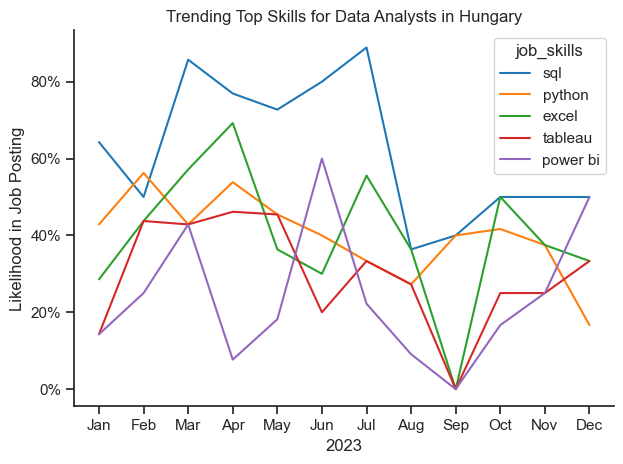

In [18]:
df_plot = df_role_country_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title(f'Trending Top Skills for {role}s in {country}')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')

from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()